In [ ]:
import pandas as pd
data = pd.read_csv('Churn_Modelling.csv')
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:

data.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:

data_cleaned = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
#data_cleaned.info()
data_cleaned.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']),
        ('cat', OneHotEncoder(), ['Geography', 'Gender'])
    ])



In [ ]:
X = data_cleaned.drop('Exited', axis=1)
y = data_cleaned['Exited']



In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
X_train[:5], X_test[:5], y_train[:5], y_test[:5]


(array([[ 0.35649971, -0.6557859 ,  0.34567966, -1.21847056,  0.80843615,
          1.36766974,  1.        ,  0.        ,  0.        ,  0.        ,
          1.        ],
        [-0.20389777,  0.29493847, -0.3483691 ,  0.69683765,  0.80843615,
          1.6612541 ,  0.        ,  1.        ,  0.        ,  0.        ,
          1.        ],
        [-0.96147213, -1.41636539, -0.69539349,  0.61862909, -0.91668767,
         -0.25280688,  0.        ,  0.        ,  1.        ,  0.        ,
          1.        ],
        [-0.94071667, -1.13114808,  1.38675281,  0.95321202, -0.91668767,
          0.91539272,  1.        ,  0.        ,  0.        ,  1.        ,
          0.        ],
        [-1.39733684,  1.62595257,  1.38675281,  1.05744869, -0.91668767,
         -1.05960019,  1.        ,  0.        ,  0.        ,  0.        ,
          1.        ]]),
 array([[-0.57749609, -0.6557859 , -0.69539349,  0.32993735,  0.80843615,
         -1.01960511,  0.        ,  1.        ,  0.        ,  0.     

In [ ]:
data_cleaned.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Training
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluating
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)

print("Accuracy:", accuracy_log_reg)
print("Confusion Matrix:\n", conf_matrix_log_reg)
print("Classification Report:\n", class_report_log_reg)

Accuracy: 0.8035
Confusion Matrix:
 [[1552   55]
 [ 338   55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1607
           1       0.50      0.14      0.22       393

    accuracy                           0.80      2000
   macro avg       0.66      0.55      0.55      2000
weighted avg       0.76      0.80      0.76      2000



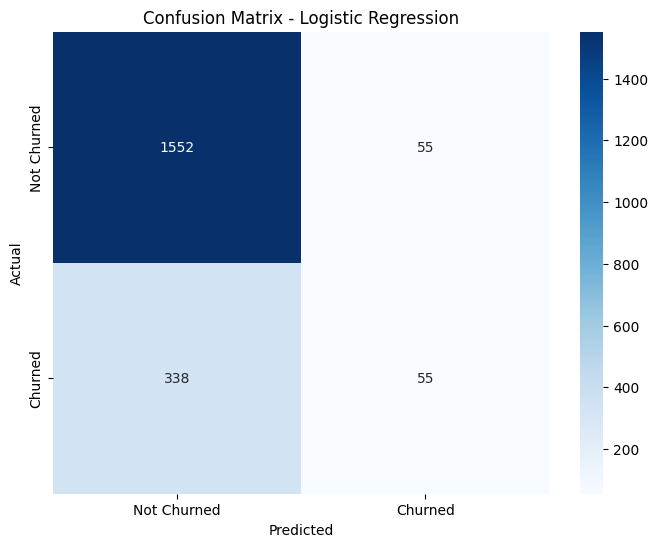

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()




In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Training
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluating
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)


Accuracy: 0.849
Confusion Matrix:
 [[1528   79]
 [ 223  170]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1607
           1       0.68      0.43      0.53       393

    accuracy                           0.85      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000



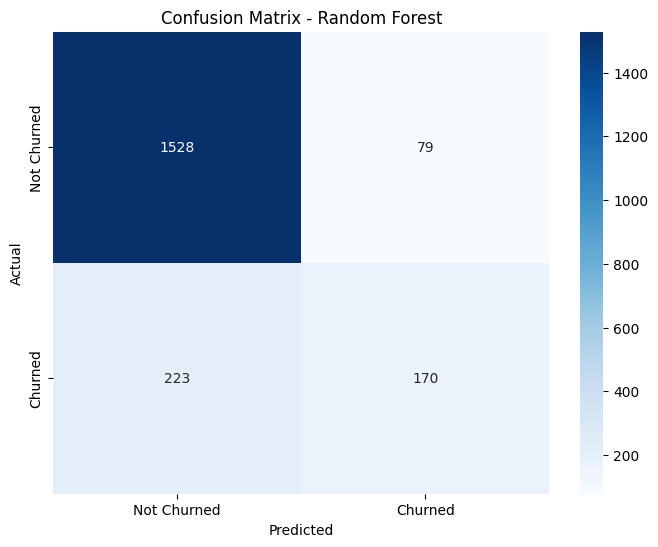

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Training
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluating
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

print("Accuracy:", accuracy_gb)
print("Confusion Matrix:\n", conf_matrix_gb)
print("Classification Report:\n", class_report_gb)


Accuracy: 0.855
Confusion Matrix:
 [[1538   69]
 [ 221  172]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1607
           1       0.71      0.44      0.54       393

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



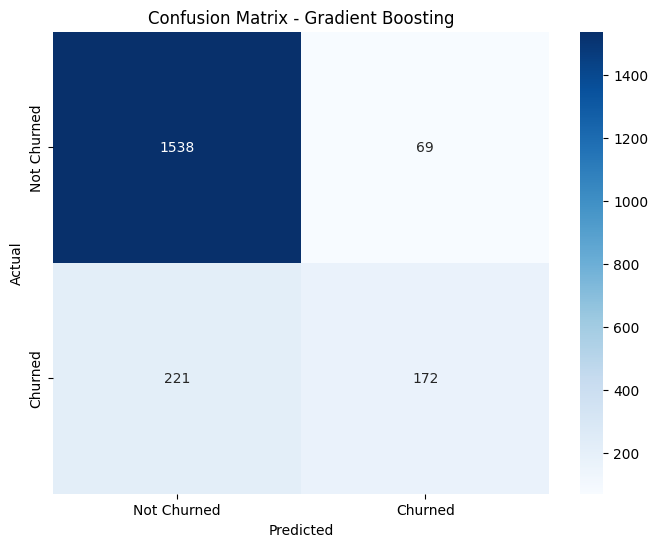

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()


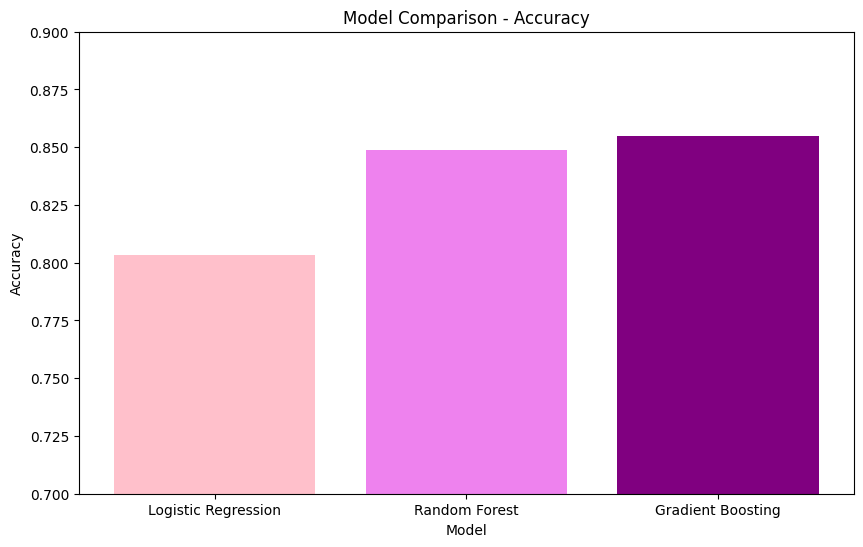

In [ ]:
import matplotlib.pyplot as plt
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracies = [accuracy_log_reg, accuracy_rf, accuracy_gb]
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['pink', 'violet', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.ylim(0.7, 0.9)
plt.show()


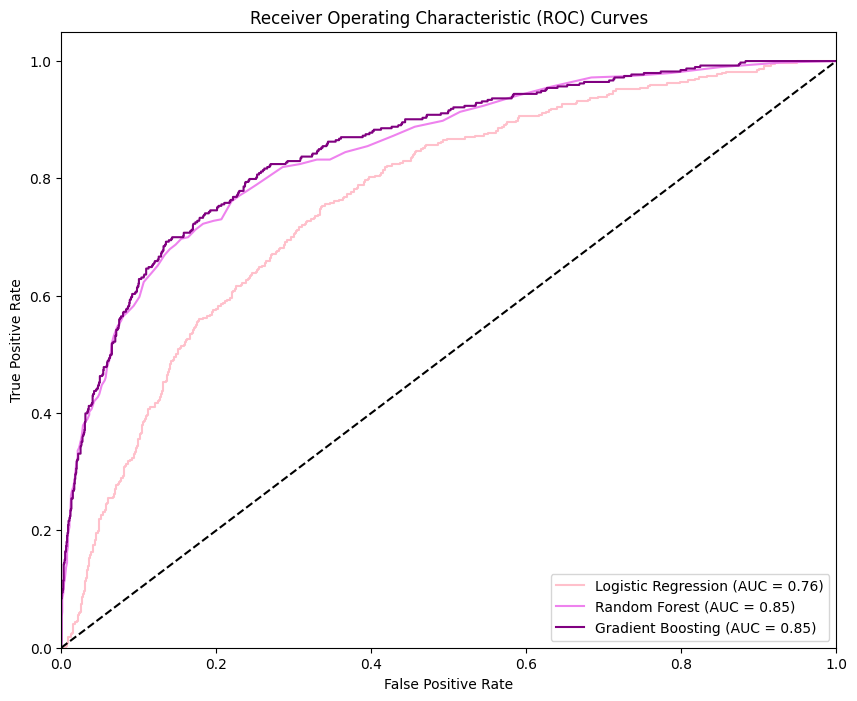

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Logistic Regression ROC Curve
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_prob_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)

# Random Forest ROC Curve
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Gradient Boosting ROC Curve
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)

plt.figure(figsize=(10, 8))
plt.plot(fpr_log_reg, tpr_log_reg, color='pink', label='Logistic Regression (AUC = %0.2f)' % roc_auc_log_reg)
plt.plot(fpr_rf, tpr_rf, color='violet', label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_gb, tpr_gb, color='purple', label='Gradient Boosting (AUC = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


In [ ]:
Gradient_model = GradientBoostingClassifier()
Gradient_model.fit(X_train, y_train)
import joblib
joblib.dump(Gradient_model, 'Gradient_model.pkl')

['Gradient_model.pkl']